# Feature detection

## Harris Corner detection

As always we start with the imports

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

As a start we will use the same checkerboard image as earlier.

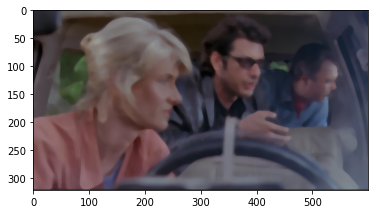

In [6]:
img = cv2.imread('jp.png')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])


img = cv2.medianBlur(img, 9)
#img = cv2.GaussianBlur(img, (9,9), 0)

plt.imshow(img)

### Exercise 2a
Fill in the missing code in the next block. We would like to detect the corners of the image using the OpenCV function [cv2.cornerHarris](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=cornerharris#cornerharris). Afterwards we would like to draw the location of the detected corners on the image and display it.

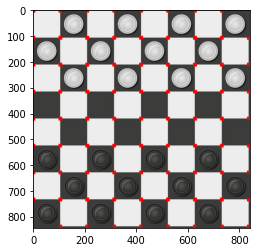

In [7]:
# Clear the image
img = cv2.imread('checkers.png')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])

# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Use Harrison with:
#   - blocksize: Neighbourhood size
#   - ksize: kernel size for the sobel algorithm
#   - k: Free parameter
# Returns a 2D height map, where max values are corners. 
corners = cv2.cornerHarris(gray, blockSize=2, ksize=5, k=0.07)

# Increase size of corners by dialation
corners = cv2.dilate(corners, None, iterations=5)

# Draw the corners onto image in red. 
# Corners are the local maxima in the response map "corners",
# if the point in corner is above a certain threshold, we concider it a corner and draw it onto the image.
# => "if corners > 0.01 * corners.max() -> set it to (255, 0, 0)"
img[corners > 0.01 * corners.max()]=[255, 0, 0]

plt.imshow(img)



## Shi-Tomasi
Next we will try the Shi-Tomasi feature detection method. In OpenCV the function is called [cv2.goodFeaturesToTrack](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html#goodfeaturestotrack). 
Let's start with a different image this time.

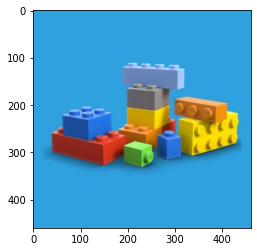

In [8]:
img = cv2.imread('Lego.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2b
Just like the previous exercise, detect the corners of the image by inserting the missing code, this time using the Shi-Tomasi (good features to track) method. Draw the detected corners on the image. Check the documentation of the function for help.

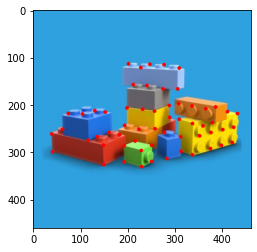

In [9]:
# Load image
img = cv2.imread('Lego.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])

# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Shi-Tomasi corner detection function
# - Detecting n best corners
# - Disregarding corners below a certain quality
# - With min distance of 10pixels between each corner.
# Returns a 100x1x2 vector of x,y coordinates of all n corners seen.
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.02, minDistance=20)

## Want to draw corners as circles, casting array to int.
corners = np.int0(corners)
for c in corners:
    # c is a 1x2 column vector
    x, y = c[0][0], c[0][1]
    cv2.circle(img, (x, y), 4, (255, 0, 0), -1)

# Display image
plt.imshow(img)

### Exercise 2c
Do a Harris corner detection on the same Lego image and compare the result with the Shi-Tomasi image.

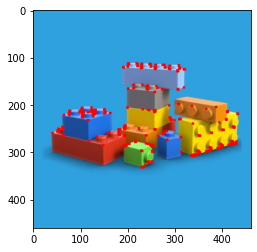

In [10]:
# Clear the image
img = cv2.imread('Lego.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])

# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Use Harrison with:
#   - blocksize: Neighbourhood size
#   - ksize: kernel size for the sobel algorithm
#   - k: Free parameter
# Returns a 2D height map, where max values are corners. 
corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.001)
#corners = cv2.cornerHarris(gray, blockSize=2, ksize=5, k=0.07)

# Increase size of corners by dialation
corners = cv2.dilate(corners, None, iterations=2)

# Draw the corners onto image in red. 
# Corners are the local maxima in the response map "corners",
# if the point in corner is above a certain threshold, we concider it a corner and draw it onto the image.
# => "if corners > 0.01 * corners.max() -> set it to (255, 0, 0)"
img[corners > 0.01 * corners.max()]=[255, 0, 0]
#img[corners > 0.01 * corners.max()]=[255, 0, 0]

plt.imshow(img)

